**In this Notebook we work on Titanic passengers database and make predictions on their survival. We use scikit-learn package, please feel free to learn classification in scikit from here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Most of the functions needed for the homework are in the notebook, please look at the arguments for each function and play with them to improve your understanding**



In [1]:
!pip3 install pandas

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


**Explore the dataset by looking at the features. For improving the accuracy you can play with features as well, if you feel some of the features are not needed, you can drop them**

In [3]:
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the dataset, here you find the count, statistics of dataset**

In [5]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


**Look at labeled data of both training and evaluation set**

In [6]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [7]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**In the next few plots you can observe few more things in the dataset like distribution of age of passengers. Make good observations on the features, it might help you push your prediction accuracy**

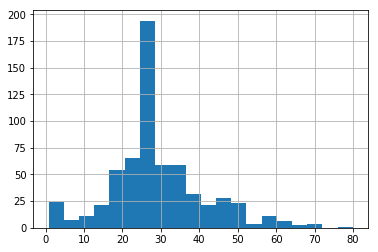

In [8]:
dftrain.age.hist(bins=20)
plt.show()


**Make some observations on the unfortundate :( data set**

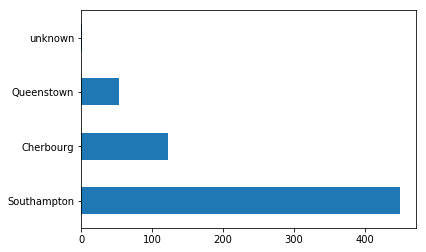

In [9]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived passengers for each class**

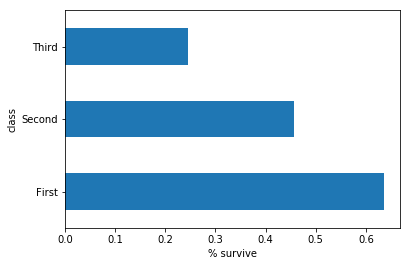

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


**Alright! lets get started! by now you must be wondering how to run learning algorithms on categorial features(we care only about numbers right!). Dataset has categorial features like embark_town, deck, class etc. These are strings but all the algorithms need numericals right. So, we have to change categorial features to numerical features. There are three different ways to do that, here we present one and the easiest way to do that**

In [11]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
dftrain.shape
dfeval.shape


(264, 22)

**Here we are dropping one of the features to align training and evaluation datasets, you can use this to drop features you might consider unnecessary**

In [12]:
dftrain = dftrain.drop(columns="deck_G")

In [13]:
dftrain.shape

(627, 22)

In [14]:
dfeval.shape


(264, 22)

**Decision Tree Classification**

In [15]:
 dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


**Adaptive boosting for Decision Tree Classification**

In [16]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 76.13636363636364 %


**Linear SVM classifier**

In [17]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 75.37878787878788 %


In [18]:

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")


Accuracy: 74.24242424242425 %


**Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

In [19]:

svclassifier = SVC(gamma='scale',kernel='poly', degree = 1, shrinking = True)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 68.93939393939394 %


**It's all yours now, get the best possible accuracy in doing so understand the concepts we learnt in class. Hold on fellas, one more thing, don't push yourself so hard to get 100% though!**

## Depth of Decision tree changed to 5,10,50 

In [21]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 79.54545454545455 %


In [23]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 81.06060606060606 %


In [24]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=50),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.1969696969697 %


### Increase in depth of decision tree leads to increase in accuracy since the data becomes more fine


## Kernel variation as linear, sigmoid, poly, rbf

In [32]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 75.37878787878788 %


In [33]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 68.93939393939394 %


In [34]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 64.77272727272727 %


In [35]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 56.81818181818182 %


### It can be observed that the linear kernel has hughest accuracy and peforms better compared to other kernels.

## SVM boosting

In [36]:
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")


Accuracy: 74.24242424242425 %


In [38]:
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 69.31818181818183 %


In [42]:
svc=SVC(probability=True, kernel='sigmoid')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 65.9090909090909 %


In [41]:
svc=SVC(probability=True, kernel='poly')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 63.63636363636363 %


## Decision tree + boosting to get required accuracy

In [95]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 85.22727272727273 %


### I have used the depth of the tree as 20, number of estimators as 100 and used boosting to improve the accuracy to 85%

In [197]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)


print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 85.7851 %
